In [ ]:
import yfinance as yf
# Downloading 1-minute interval data for Apple (AAPL)
apple_minute_data = yf.download("AAPL", start="2024-09-02", end="2024-09-06", interval="1m")

[*********************100%***********************]  1 of 1 completed


If you want 1-minute data, make sure the start and end dates are within the last 30 days

In [ ]:
apple_minute_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-09-03 09:30:00-04:00,228.610001,228.645004,228.161606,228.238495,228.238495,2279569
2024-09-03 09:31:00-04:00,228.289993,229.000000,228.179993,228.809998,228.809998,310819
2024-09-03 09:32:00-04:00,228.789993,228.830002,228.160004,228.320007,228.320007,172811
2024-09-03 09:33:00-04:00,227.445694,227.445694,227.445694,227.445694,227.445694,307142
2024-09-03 09:34:00-04:00,227.410004,227.445007,226.910294,227.050003,227.050003,311693
...,...,...,...,...,...,...
2024-09-05 15:55:00-04:00,222.039993,222.299896,221.979996,222.059998,222.059998,208424
2024-09-05 15:56:00-04:00,222.070007,222.220703,222.000000,222.039993,222.039993,164088
2024-09-05 15:57:00-04:00,222.044998,222.160004,221.970001,222.080002,222.080002,174129


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
df_scaled = pd.DataFrame(scaler.fit_transform(apple_minute_data), columns=apple_minute_data.columns)

In [ ]:
time_step=15
indices = np.arange(time_step, df_scaled.shape[0], time_step)
y = df_scaled['Close'][indices]

In [ ]:
X = df_scaled[:len(y)*time_step]

Number of samples=Total data points−Time step window size+1=389−15+1=375

In [ ]:
data = X.to_numpy()

timesteps = 15
X = []

for i in range(0, len(data), timesteps):
    X.append(data[i:i + timesteps])

X = np.array(X)

In [ ]:
X.shape

(77, 15, 6)

In [ ]:
#70% train
train_size = int(X.shape[0] *0.7)
X_train = X[:train_size + 1]
y_train = y[:train_size + 1]
X_test =  X[train_size + 1 :]
y_test = y[train_size + 1 :]

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape, X_train.shape[0] + X_test.shape[0], y_train.shape[0] + y_test.shape[0]

((54, 15, 6), (54,), (23, 15, 6), (23,), 77, 77)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense
model = Sequential()
model.add(GRU(units=10, activation='tanh', return_sequences=True, input_shape=((time_step, 6))))
model.add(GRU(units=10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='MSE', optimizer='adam')
model.fit(X_train, y_train, epochs=5, batch_size=1)
y_pred = model.predict(X_train)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0446
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0302
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0226
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step


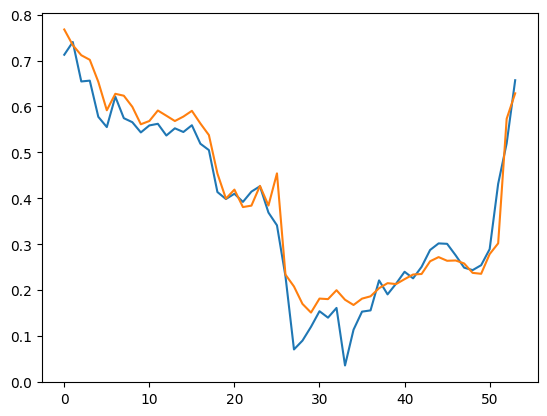

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_pred)), y_pred)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense
model = Sequential()
model.add(LSTM(units=24, activation='tanh', return_sequences=True, input_shape=((time_step, 6))))
model.add(LSTM(units=24, activation='tanh', return_sequences=True))
model.add(LSTM(units=10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=1)
y_pred = model.predict(X_train)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0421
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0182
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0037
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0037
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0047
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step


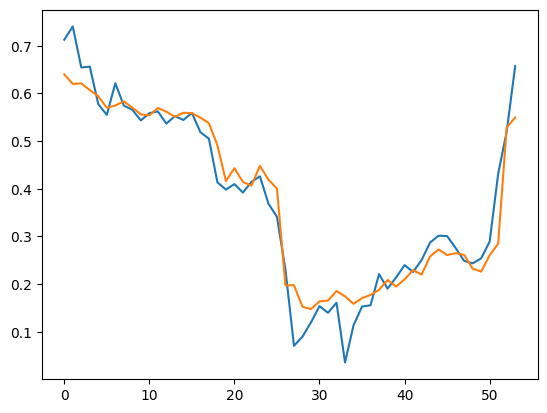

In [ ]:

plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_pred)), y_pred)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Bidirectional
model = Sequential()
model.add(Bidirectional(GRU(units=24, activation='tanh', return_sequences=True, input_shape=((time_step, 1)))))
model.add(Bidirectional(GRU(units=24, activation='tanh', return_sequences=True)))
model.add(Bidirectional(GRU(units=10, activation='tanh')))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=5, batch_size=1)
y_pred = model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0507
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0144
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0019
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0013
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0000e+00 - loss: 0.0018
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 955ms/step


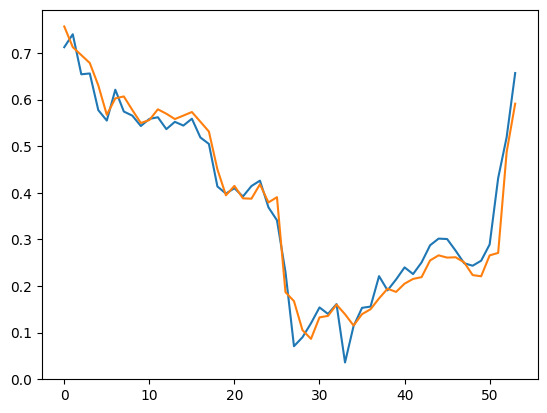

In [ ]:

plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_pred)), y_pred)